# I] Import and options


In [71]:
import pandas, numpy, seaborn, scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [72]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [73]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

## A) Extracellular Acidification Rate 

In [74]:
%%time
data = "ecar_exp1_df_", "ecar_exp2_df_", "ecar_exp3_df_"
all_conditions = "dmso", "baf"

ecar_exps = []

for condition in all_conditions:
    for file in data: 
        #download data
        path = output_file_directory + "ATG7/Seahorse_results/seahorse_ECAR/"+file +condition +".csv"
        df = pandas.read_csv(path, sep = ",")
        #create normalized columns and rename
        df = df.assign(EVnorm= df['Empty Vector +dox']/ df['Empty Vector +dox'],
                       ATG7_1norm= df['ATG7(1)']/ df['Empty Vector +dox'],
                       ATG7_2norm= df['ATG7(2)']/ df['Empty Vector +dox'])
        df = df[['EVnorm','ATG7_1norm','ATG7_2norm']]
        df = df.rename(columns = {'EVnorm' : 'MEF-/-','ATG7_1norm' : 'ATG7(1)','ATG7_2norm' : 'ATG7(2)'})
        ecar_exps.append(df)

ecar_dmso_exp = pandas.concat([ecar_exps[0], ecar_exps[1], ecar_exps[2]], axis=0)
ecar_baf_exp = pandas.concat([ecar_exps[3], ecar_exps[4], ecar_exps[5]], axis=0)
print(ecar_dmso_exp, '\n', ecar_baf_exp)

   MEF-/-   ATG7(1)   ATG7(2)
0     1.0  1.346141  0.904119
1     1.0  1.343781  1.043421
2     1.0  1.333029  1.045764
0     1.0  1.245590  0.815088
1     1.0  1.223705  0.782286
2     1.0  1.187035  0.771402
0     1.0  1.446510  0.823793
1     1.0  1.364167  0.665330
2     1.0  1.357555  0.711864 
    MEF-/-   ATG7(1)   ATG7(2)
0     1.0  1.189939  0.711381
1     1.0  1.237981  0.698163
2     1.0  1.309724  0.703404
0     1.0  0.997847  0.576276
1     1.0  1.055864  0.597071
2     1.0  1.054395  0.592903
0     1.0  0.933618  0.651319
1     1.0  0.941970  0.684557
2     1.0  0.900535  0.674361
Wall time: 33.9 ms


the pvalue between ATG7(1) and ATG7(2) with DMSO is 2.061E-04


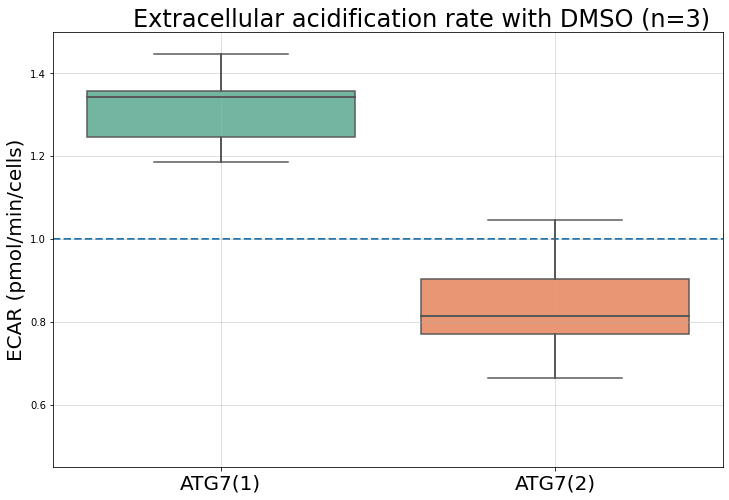

the pvalue between ATG7(1) and ATG7(2) with BAF is 2.061E-04


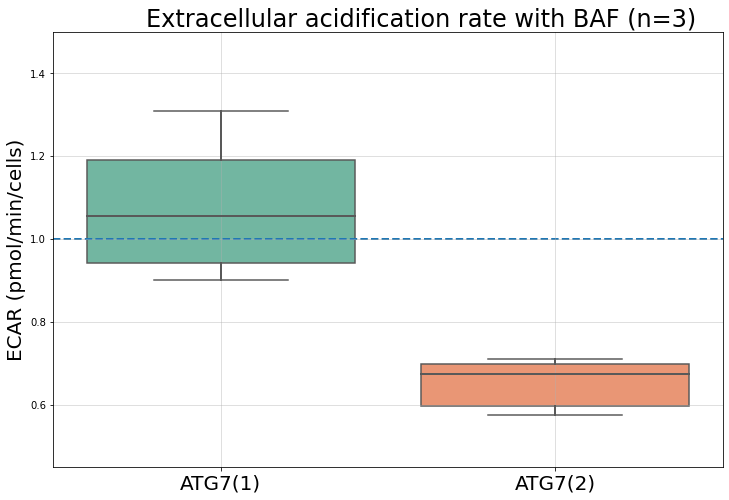

<Figure size 864x576 with 0 Axes>

In [83]:

all_data = [[ecar_dmso_exp, 'DMSO'], [ecar_baf_exp, 'BAF']]

for data in all_data:
    df = data[0]
    condition = data[1]
    
    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between ATG7(1) and ATG7(2) with", condition,"is", Pvalue)

    #Graph, Bloxplot
    seaborn.boxplot(palette = 'Set2', data = df.iloc[:,1:], 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

    plt.axhline(y=1, ls='--', lw=2, color='tab:blue', zorder=1)
    plt.ylabel('ECAR (pmol/min/cells)')
    plt.ylim(0.45,1.5)
    plt.xlabel('')
    text_title = 'Extracellular acidification rate with '+ condition+ ' (n=3)'
    plt.title(text_title, x=.55)
    plt.grid(alpha = 0.5)

    # save
    path = 'ATG7/Seahorse_results/seahorse_ECAR/'
    text_file = 'graph_all_ecar_'+condition
    plt.savefig(output_file_directory+path+text_file+'.svg')
    plt.show()
    plt.clf()


## B) Oxygen Consumption Rate 

In [76]:
%%time
data = "ocr_exp2_df_", "ocr_exp7_df_", "ocr_exp12_df_"
all_conditions = "dmso", "baf"

ocr_exps = []

for condition in all_conditions:
    for file in data: 
        #download data
        path = output_file_directory + "ATG7/Seahorse_results/seahorse_OCR/"+file +condition +".csv"
        df = pandas.read_csv(path, sep = ",")
        #create normalized columns and rename
        df = df.assign(EVnorm= df['Empty Vector +dox']/ df['Empty Vector +dox'],
                       ATG7_1norm= df['ATG7(1)']/ df['Empty Vector +dox'],
                       ATG7_2norm= df['ATG7(2)']/ df['Empty Vector +dox'])
        df = df[['EVnorm','ATG7_1norm','ATG7_2norm']]
        df = df.rename(columns = {'EVnorm' : 'MEF-/-','ATG7_1norm' : 'ATG7(1)','ATG7_2norm' : 'ATG7(2)'})
        ocr_exps.append(df)

ocr_dmso_exp = pandas.concat([ocr_exps[0], ocr_exps[1], ocr_exps[2]], axis=0)
ocr_baf_exp = pandas.concat([ocr_exps[3], ocr_exps[4], ocr_exps[5]], axis=0)
print(ocr_dmso_exp, '\n', ocr_baf_exp)

   MEF-/-   ATG7(1)   ATG7(2)
0     1.0  1.614099  1.375309
1     1.0  1.777499  1.484735
2     1.0  1.925270  1.484642
0     1.0  1.128905  0.511328
1     1.0  1.156366  0.517622
2     1.0  1.150214  0.513062
0     1.0  1.116841  0.873952
1     1.0  1.089108  0.848306
2     1.0  1.100030  0.872564 
    MEF-/-   ATG7(1)   ATG7(2)
0     1.0  1.615872  0.746534
1     1.0  1.261050  0.804043
2     1.0  1.234342  0.861181
0     1.0  1.441210  0.798992
1     1.0  1.432946  0.788134
2     1.0  1.427871  0.797774
0     1.0  1.455943  0.682703
1     1.0  1.478245  0.702154
2     1.0  1.487554  0.745073
Wall time: 31.1 ms


the pvalue between ATG7(1) and ATG7(2) with DMSO is 2.603E-02


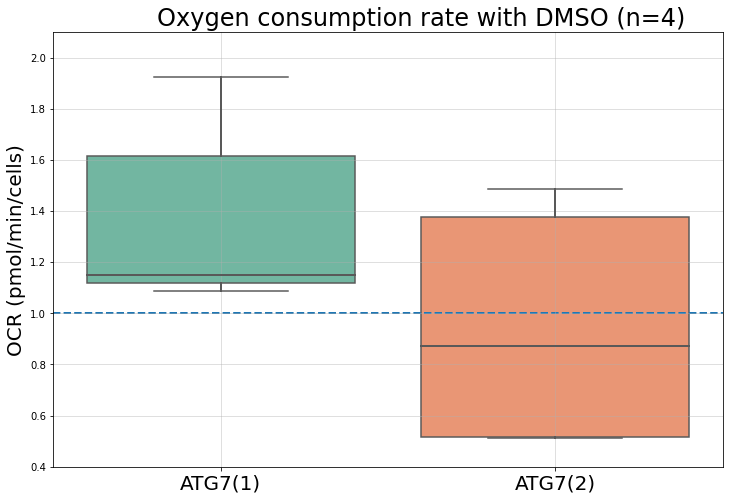

the pvalue between ATG7(1) and ATG7(2) with BAF is 2.061E-04


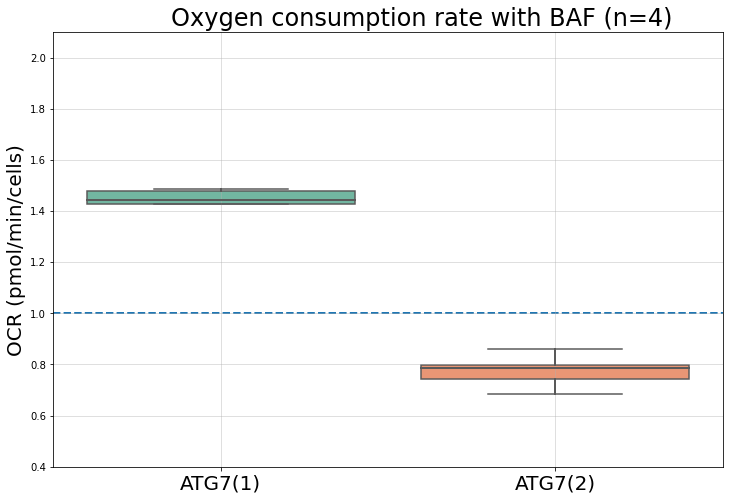

<Figure size 864x576 with 0 Axes>

In [80]:
all_data = [[ocr_dmso_exp, 'DMSO'], [ocr_baf_exp, 'BAF']]

for data in all_data:
    df = data[0]
    condition = data[1]
    
    # Mann-Whitney analysis 
    statistic, pvalue = scipy.stats.mannwhitneyu(df['ATG7(1)'], df['ATG7(2)'])
    Pvalue = "{:.3E}".format(pvalue)
    print("the pvalue between ATG7(1) and ATG7(2) with", condition,"is", Pvalue)

    #Graph, Bloxplot
    seaborn.boxplot(palette = 'Set2', data = df.iloc[:,1:], 
                    medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)
#     seaborn.swarmplot(data = df, color = "0.25")
    plt.axhline(y=1, ls='--', lw=2, color='tab:blue', zorder=1)
    plt.ylabel('OCR (pmol/min/cells)')
    plt.ylim(0.4,2.1)
    plt.xlabel('')
    text_title = 'Oxygen consumption rate with '+ condition+ ' (n=4)'
    plt.title(text_title, x=.55)
    plt.grid(alpha = 0.5)

    # save
    path = 'ATG7/Seahorse_results/seahorse_OCR/'
    text_file = 'graph_all_ocr_'+condition
    plt.savefig(output_file_directory+path+text_file+'.svg')
    plt.show()
    plt.clf()
